### Multi-class Classifier

Let us build a model to distinguish between more than two classes using rock, paper and scissors dataset.

In [1]:
#import libraries

import os
import random
import numpy as np
from io import BytesIO

#plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

#interactive widgets
from ipywidgets import widgets


In [2]:
base_dir = "D:\\Tensorflow_Works\\7-Multiclass Classifications\\Rock-Paper-Scissors"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

rock_dir = os.path.join(train_dir, "rock")
paper_dir = os.path.join(train_dir, "paper")
scissors_dir = os.path.join(train_dir, "scissors")

test_rock_dir = os.path.join(test_dir, "rock")
test_paper_dir = os.path.join(test_dir, "paper")
test_scissors_dir = os.path.join(test_dir, "scissors")

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(f"Total training rock images: {len(os.listdir(rock_dir))}")
print(f"Total training paper images: {len(os.listdir(paper_dir))}")
print(f"Total training scissors images: {len(os.listdir(scissors_dir))}")

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840


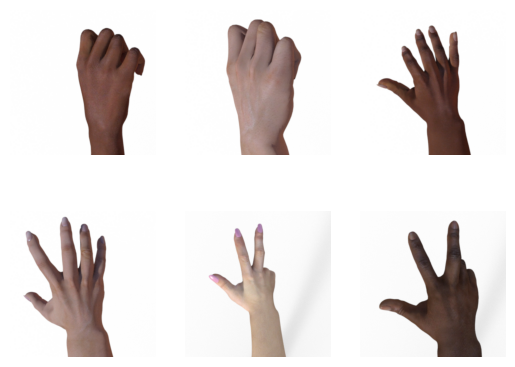

In [3]:
#sample images visualization

next_rock = [os.path.join(rock_dir, f) for f in random.sample(rock_files, k=2)]
next_paper = [os.path.join(paper_dir, f) for f in random.sample(paper_files, k=2)]
next_scissors = [os.path.join(scissors_dir, f) for f in random.sample(scissors_files, k=2)]

for i, filepath in enumerate(next_rock + next_paper + next_scissors):
    plt.subplot(2,3,i+1)
    img = mpimg.imread(filepath)
    plt.imshow(img)
    plt.axis("off")



In [4]:
#building a model

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(scale=1./255),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")


])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#instantiating training and test datasets

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode="categorical"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode="categorical"
)


#optimizing the datasets for training

train_dataset_final = (train_dataset.cache()
                       .shuffle(1000)
                       .prefetch(tf.data.AUTOTUNE))

test_dataset_final = (test_dataset.cache()
                      .prefetch(tf.data.AUTOTUNE))


Found 2520 files belonging to 3 classes.
Found 372 files belonging to 3 classes.


In [6]:
#adding data augmentation layers to model

data_augmentation = tf.keras.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
])


model_with_aug = tf.keras.models.Sequential([
    data_augmentation,
    model
])

In [7]:
#model compiling

model_with_aug.compile(optimizer='rmsprop',
                       loss="categorical_crossentropy",
                       metrics=['accuracy'])


In [8]:
#model training

history=model_with_aug.fit(
    train_dataset_final,
    validation_data = test_dataset_final,
    epochs=15,
    verbose=2
)

Epoch 1/15
79/79 - 15s - 190ms/step - accuracy: 0.3472 - loss: 1.1684 - val_accuracy: 0.4839 - val_loss: 1.0845
Epoch 2/15
79/79 - 14s - 173ms/step - accuracy: 0.4187 - loss: 1.0809 - val_accuracy: 0.5806 - val_loss: 0.9734
Epoch 3/15
79/79 - 15s - 185ms/step - accuracy: 0.5242 - loss: 0.9721 - val_accuracy: 0.7634 - val_loss: 0.6412
Epoch 4/15
79/79 - 15s - 190ms/step - accuracy: 0.6325 - loss: 0.7972 - val_accuracy: 0.8065 - val_loss: 0.4849
Epoch 5/15
79/79 - 15s - 187ms/step - accuracy: 0.6817 - loss: 0.7080 - val_accuracy: 0.7177 - val_loss: 0.5109
Epoch 6/15
79/79 - 14s - 183ms/step - accuracy: 0.7734 - loss: 0.5581 - val_accuracy: 0.8763 - val_loss: 0.2559
Epoch 7/15
79/79 - 14s - 182ms/step - accuracy: 0.8052 - loss: 0.4997 - val_accuracy: 0.9489 - val_loss: 0.1888
Epoch 8/15
79/79 - 14s - 182ms/step - accuracy: 0.8163 - loss: 0.4747 - val_accuracy: 0.9382 - val_loss: 0.3036
Epoch 9/15
79/79 - 15s - 184ms/step - accuracy: 0.8500 - loss: 0.3825 - val_accuracy: 0.8871 - val_loss:

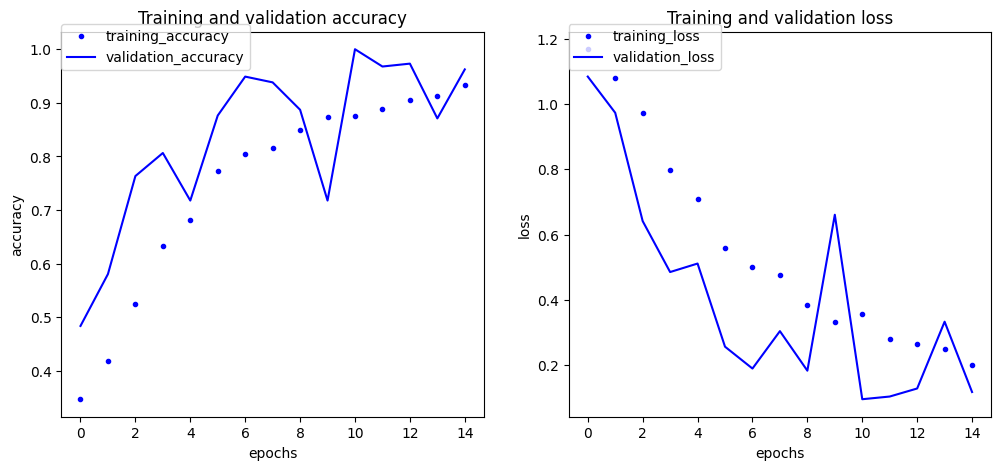

In [9]:
def plot_loss_acc(history):

    plt.subplots(1,2, figsize=(12,5))
    epochs = range(len(history.history['accuracy']))
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, "b.", label="training_accuracy")
    plt.plot(epochs, val_accuracy, "b-", label="validation_accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("Training and validation accuracy")
    plt.legend(loc=[0,0.9])

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, "b.", label="training_loss")
    plt.plot(epochs, val_loss, "b-", label="validation_loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Training and validation loss")
    plt.legend(loc=[0,0.9])

plot_loss_acc(history)    

In [10]:
#model prediction

from ipywidgets import widgets
import numpy as np
from io import BytesIO

uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_prediction(filename, file, out):

    img_file = tf.keras.utils.load_img(file, target_size=(150, 150))
    img_array = tf.keras.utils.img_to_array(img_file)
    img = np.expand_dims(img_array, axis=0)
    prediction = model_with_aug.predict(img, verbose=False)[0]

    with out:

        print(f'\nmodel output: {prediction}')
        prediction_index = np.argmax(prediction)
        classes = ["paper", "rock", "scissors"]
        predicted_class = classes[prediction_index]
        print(f'{filename} is {predicted_class}')


def on_upload_change(change):

        for file_info in uploader.value:
            file_jpg = BytesIO(file_info['content'])
            file_prediction(file_info.name, file_jpg, out)

uploader.observe(on_upload_change, names="value")  



FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()